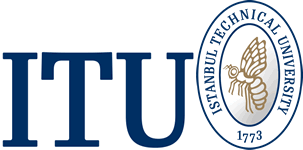

# GEO468E - Special Topics in Remote Sensing Indiviual Homework

## NDVI Calculation & Analyze for Landsat 8 Data

* __Yakup Ata Özarslan - 010160529__


* __Due Date: 15/01/2021__

## [For More Information Please Contacting Me With (Click Here!)](https://ataozarslan.github.io/)

In [1]:
# Importing necessary libraries

import re
import numpy as np
from skimage import io, exposure
import skimage.io
from matplotlib import pyplot as plt

In [2]:
# The code for showing graphs

%matplotlib inline 

In [3]:
# Defining some function for using during the project

def read_image(image_path):
    image = skimage.io.imread(image_path, plugin='tifffile')
    return image

def image_show(image, color_map, title):
    """
    Show image
    Input:
    img - 2D array of uint16 type
    color_map - string
    title - string
    """
    fig = plt.figure(figsize=(10, 10))
    fig.set_facecolor('white')
    plt.imshow(image, cmap=color_map)
    plt.title(title)
    plt.show()
    
def image_adjust_brightness(image, limit_left, limit_right, color_map, title):
    """
    Adjust image brightness and plot the image
    Input:
    img - 2D array of uint16 type
    limit_left - integer
    limit_right - integer
    color_map - string
    title - string
    """
    image_ha = exposure.rescale_intensity(image, (limit_left, limit_right))
    
    fig = plt.figure(figsize=(10, 10))
    fig.set_facecolor('white')
    plt.imshow(image_ha, cmap=color_map)
    plt.title(title)
    plt.colorbar()  
    plt.show()
    
    return image_ha

In [4]:
# Importing the Landsat8 satellite image taken on 8 July 2020.  

image_path = r"E:\Desktop\ITU\2020_2021\GEO468E\Individual_Homework\Test Images\Landsat8_2020.tif"

image1 = read_image(image_path)

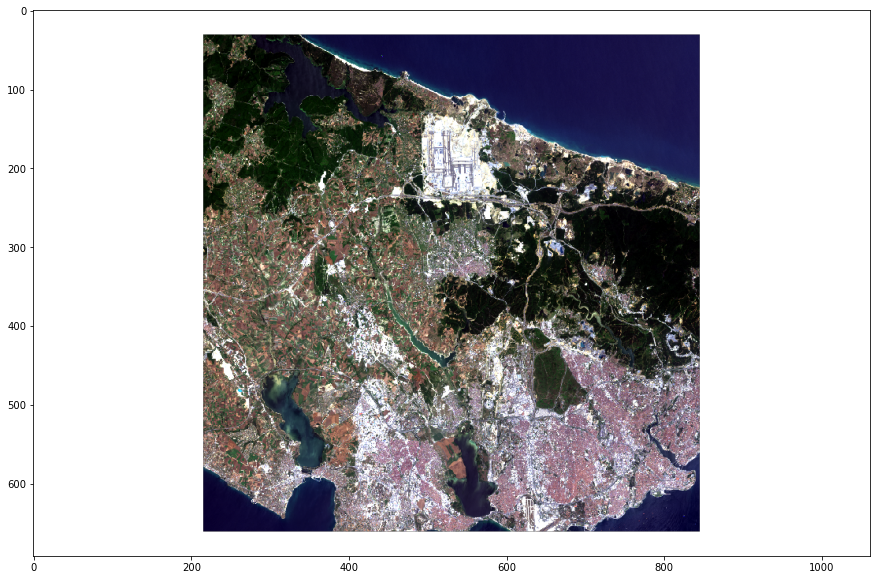

In [5]:
# Landsat8 satellite image taken on 8 July 2020 in RGB band combination.

plt.figure(figsize=(15, 15))
plt.imshow(image1)

In [6]:
# Importing the Landsat8 satellite image taken on 3 May 2017.

image_path = r"E:\Desktop\ITU\2020_2021\GEO468E\Individual_Homework\Test Images\Landsat8_2017.tif"

image2 = read_image(image_path)

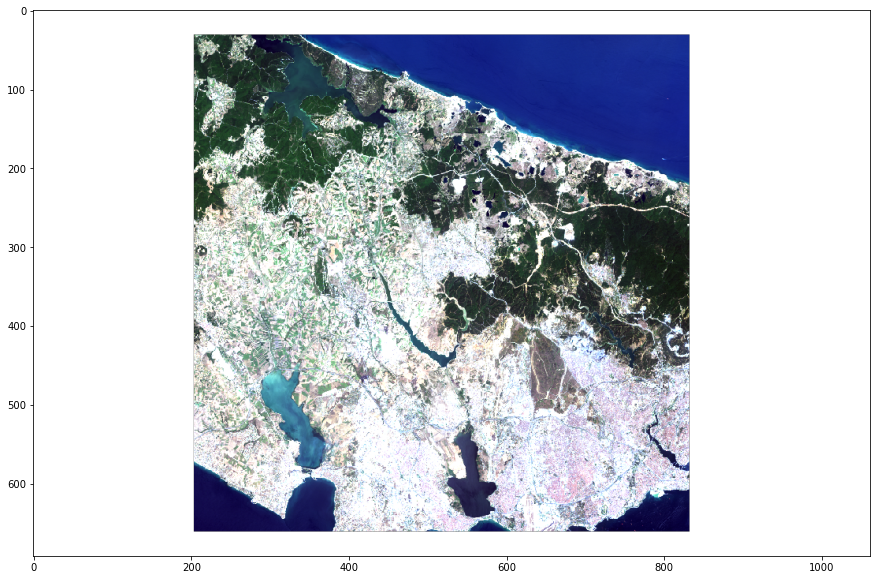

In [7]:
# Landsat8 satellite image taken on 3 May 2017 in RGB band combination.

plt.figure(figsize=(15, 15))
plt.imshow(image2)

In [8]:
# Obtaining the bands to be used in first image

red_1 = image1[:,:,0]
NIR_1 = image1[:,:,-1]

np_NIR_1 = NIR_1.astype(np.float32)
np_red_1 = red_1.astype(np.float32)

In [9]:
# Calculating NDVI index for first image

ndvi_1 = (np_NIR_1 - np_red_1) / (np_NIR_1 + np_red_1)

<ipython-input-9-ac7131832394>:3: RuntimeWarning: invalid value encountered in true_divide
  ndvi_1 = (np_NIR_1 - np_red_1) / (np_NIR_1 + np_red_1)


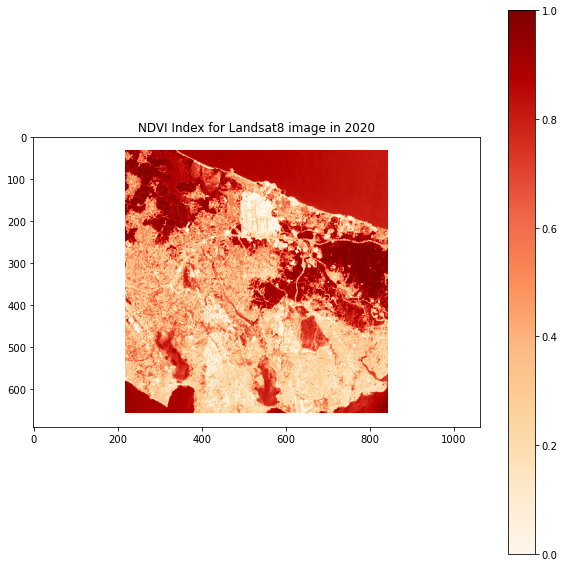

In [10]:
# Creating a satellite image of the computed index

img_ha_1 = image_adjust_brightness(ndvi_1, 0, 1, 'OrRd', 'NDVI Index for Landsat8 image in 2020')

In [11]:
# Obtaining the bands to be used in second image

red_2 = image2[:,:,0]
NIR_2 = image2[:,:,-1]

np_NIR_2 = NIR_2.astype(np.float32)
np_red_2 = red_2.astype(np.float32)

In [12]:
# Calculating NDVI index for second image

ndvi_2 = (np_NIR_2 - np_red_2) / (np_NIR_2 + np_red_2)

<ipython-input-12-3158831cd0fe>:3: RuntimeWarning: invalid value encountered in true_divide
  ndvi_2 = (np_NIR_2 - np_red_2) / (np_NIR_2 + np_red_2)


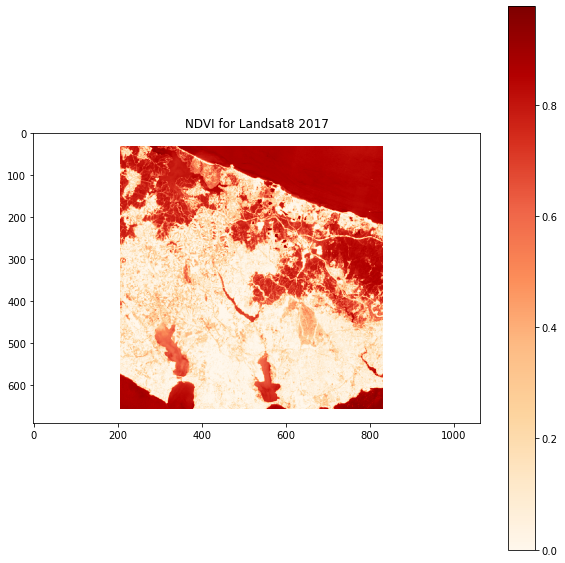

In [13]:
# Creating a satellite image of the computed index

img_ha_2 = image_adjust_brightness(ndvi_2, 0, 1, 'OrRd', 'NDVI for Landsat8 2017')

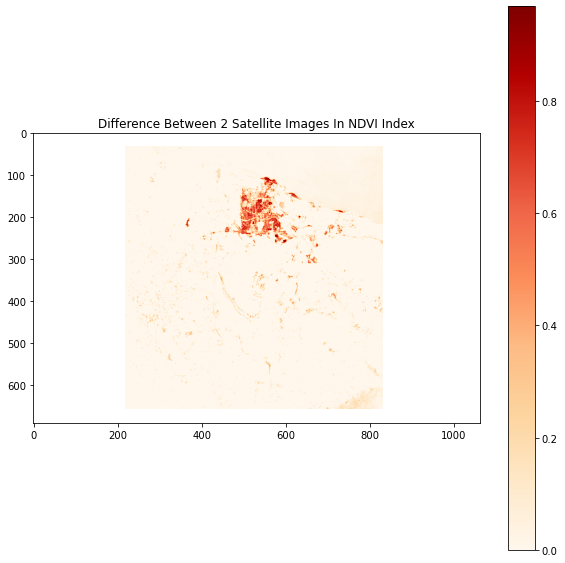

In [14]:
# Image created from the difference of 2 satellite images

img_ha_3 = image_adjust_brightness(ndvi_2 - ndvi_1, 0, 1, 'OrRd', 'Difference Between 2 Satellite Images In NDVI Index')

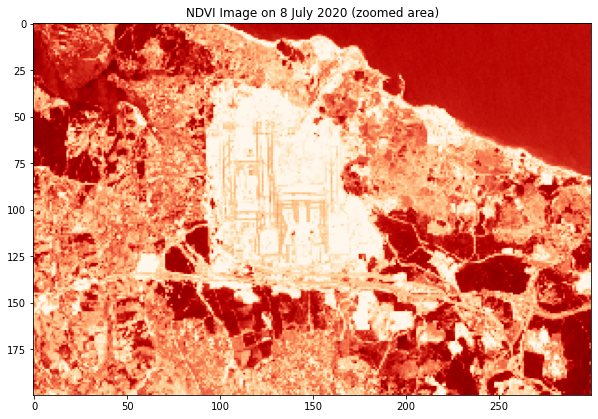

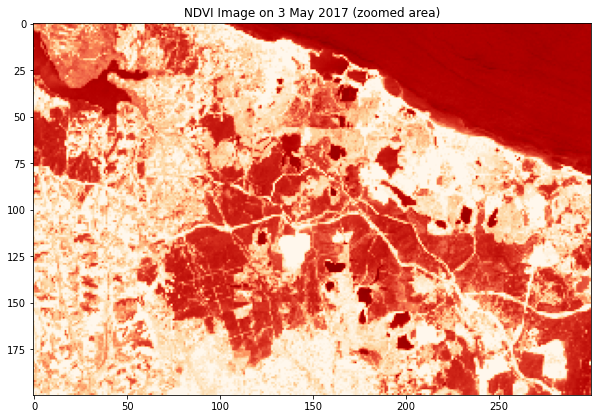

In [15]:
# Getting closer to the region where the difference is too much compared to the image obtained above

image_show(img_ha_1[100:300, 400:700], 'OrRd', 'NDVI Image on 8 July 2020 (zoomed area)')

image_show(img_ha_2[100:300, 400:700], 'OrRd', 'NDVI Image on 3 May 2017 (zoomed area)')